**Convolutional Neural Network**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
(X_train, y_train) , (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train[:5]   # prints first five elements

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)     # -1 to keep the same dimension and other one zero
y_train

label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

The imshow function of matplotlib displays the matrix as an image.

In [ ]:
def plot_sample(X_train , y_train , index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(label_names[y_train[index]])

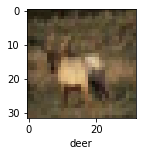

In [ ]:
plot_sample(X_train, y_train, 3)

In [ ]:
X_train = X_train / 255     # to normalise the data {mean: 0 & SD: 1}
X_test = X_test / 255
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [ ]:
cnn = models.Sequential([

    # convolution and max pooling
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D (filters = 64, kernel_size = (3,3), activation = 'relu' , input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    # dense layer
    layers.Flatten(input_shape = (32,32,3)),
    # layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')     # normalises the inputs so that the sum of outputs is 1.
 ])

cnn.compile (
    optimizer = 'adam',   # 'SGD'
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

cnn.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 114s 72ms/step - loss: 1.3696 - accuracy: 0.5115
Epoch 2/5
1563/1563 [==============================] - 112s 72ms/step - loss: 0.9804 - accuracy: 0.6555
Epoch 3/5
1563/1563 [==============================] - 114s 73ms/step - loss: 0.7946 - accuracy: 0.7227
Epoch 4/5
1563/1563 [==============================] - 113s 73ms/step - loss: 0.6369 - accuracy: 0.7796
Epoch 5/5
1563/1563 [==============================] - 115s 74ms/step - loss: 0.4843 - accuracy: 0.8319


In [ ]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 0.9348 - accuracy: 0.7087


[0.934775173664093, 0.7087000012397766]

In [ ]:
y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
y_test = y_test.reshape(-1,)
y_test

313/313 [==============================] - 6s 19ms/step


array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

'deer'

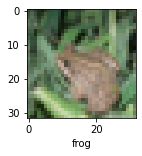

In [ ]:
plot_sample(X_test, y_test, 4)
label_names[y_classes[4]]

In [ ]:
from sklearn.metrics import classification_report
print("Classification report : \n" ,classification_report(y_test, y_classes))


Classification report : 
               precision    recall  f1-score   support

           0       0.75      0.76      0.75      1000
           1       0.91      0.70      0.79      1000
           2       0.70      0.50      0.58      1000
           3       0.51      0.54      0.52      1000
           4       0.64      0.73      0.68      1000
           5       0.57      0.65      0.61      1000
           6       0.76      0.82      0.79      1000
           7       0.81      0.72      0.77      1000
           8       0.84      0.79      0.81      1000
           9       0.70      0.88      0.78      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



**Predicting for a completely different image**


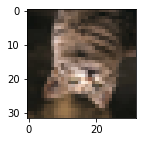

In [ ]:
from PIL import Image
img_path = '/content/cat1.jpeg'
img = Image.open(img_path)
img = img.resize((32,32))
plt.figure(figsize = (15,2))
plt.imshow(img)

In [ ]:
i = np.array(img)     # convert image into array
i = i/255            # normalise the image
i = np.expand_dims(i, axis=0)    # add extra dimension which contains batch size
i.shape

(1, 32, 32, 3)

In [ ]:
pred = cnn.predict(i)
print(pred)
pred = np.argmax(pred)     # softmax gives normalised value
label_names[pred]

1/1 [==============================] - 0s 25ms/step
[[1.5147307e-04 7.1625122e-06 3.4401279e-03 1.9856233e-02 2.1064758e-02
  2.1701107e-02 9.3249577e-01 1.1823518e-04 9.8525605e-04 1.7997979e-04]]


'frog'